# Aviation Flight Cancellation Prediction

**Author**: Hari Prasath P

## Introduction
This notebook demonstrates a project where we predict flight cancellations based on various factors such as departure delays, arrival delays, airline ratings, weather impacts, and technical issues. The dataset is synthetic but reflects common data points that could be found in a real-world aviation dataset.

## Dataset Explanation
The dataset contains 1000 samples with the following columns:
- **Flight_Number**: Unique identifier for each flight.
- **Departure_Delay**: Delay in departure time in minutes.
- **Arrival_Delay**: Delay in arrival time in minutes.
- **Airline_Rating**: Rating of the airline on a scale of 1 to 5.
- **Weather_Impact**: Binary indicator of whether the weather impacted the flight (0 = No, 1 = Yes).
- **Technical_Issue**: Binary indicator of whether there was a technical issue with the flight (0 = No, 1 = Yes).
- **Cancelled**: Binary target variable indicating whether the flight was cancelled (0 = No, 1 = Yes).

## Exploratory Data Analysis (EDA)

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [6]:

# Load the dataset
aviation_data = pd.read_csv('aviation_dataset.csv')

# Summary statistics
aviation_data.describe()


,Flight_Number,Departure_Delay,Arrival_Delay,Airline_Rating,Weather_Impact,Technical_Issue,Cancelled
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,5594.25600,6.224836,5.243492,3.089000,0.485000,0.52700,0.491000
std,2533.55383,14.915636,14.559419,1.393205,0.500025,0.49952,0.500169
min,1004.00000,-38.820257,-40.292682,1.000000,0.000000,0.00000,0.000000
25%,3467.50000,-4.084606,-4.698339,2.000000,0.000000,0.00000,0.000000
50%,5750.00000,6.078957,5.258510,3.000000,0.000000,1.00000,0.000000
75%,7806.75000,15.717307,15.074727,4.000000,1.000000,1.00000,1.000000
max,9996.00000,52.896614,52.066228,5.000000,1.000000,1.00000,1.000000


### Distribution of Delays

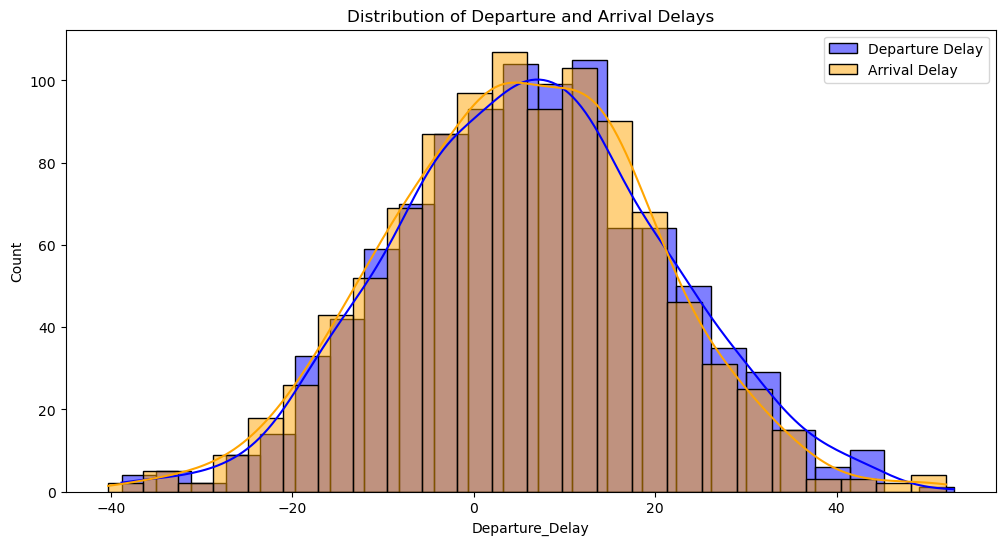

In [7]:

# Plot distribution of delays
plt.figure(figsize=(12, 6))
sns.histplot(aviation_data['Departure_Delay'], kde=True, color='blue', label='Departure Delay')
sns.histplot(aviation_data['Arrival_Delay'], kde=True, color='orange', label='Arrival Delay')
plt.title('Distribution of Departure and Arrival Delays')
plt.legend()
plt.show()


### Cancellation Rate by Airline Rating

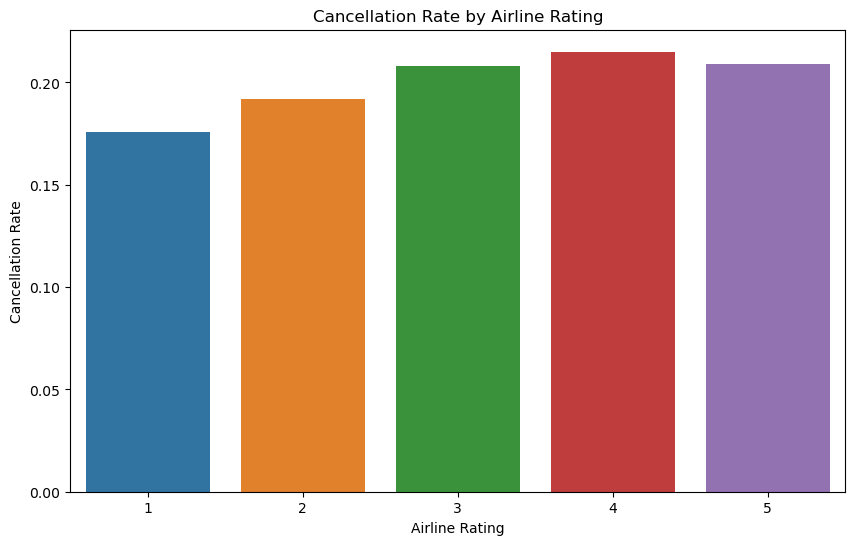

In [8]:

# Cancellation rate by airline rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline_Rating', y='Cancelled', data=aviation_data, estimator=lambda x: len(x)/len(aviation_data))
plt.title('Cancellation Rate by Airline Rating')
plt.ylabel('Cancellation Rate')
plt.xlabel('Airline Rating')
plt.show()


### Impact of Weather and Technical Issues on Cancellations

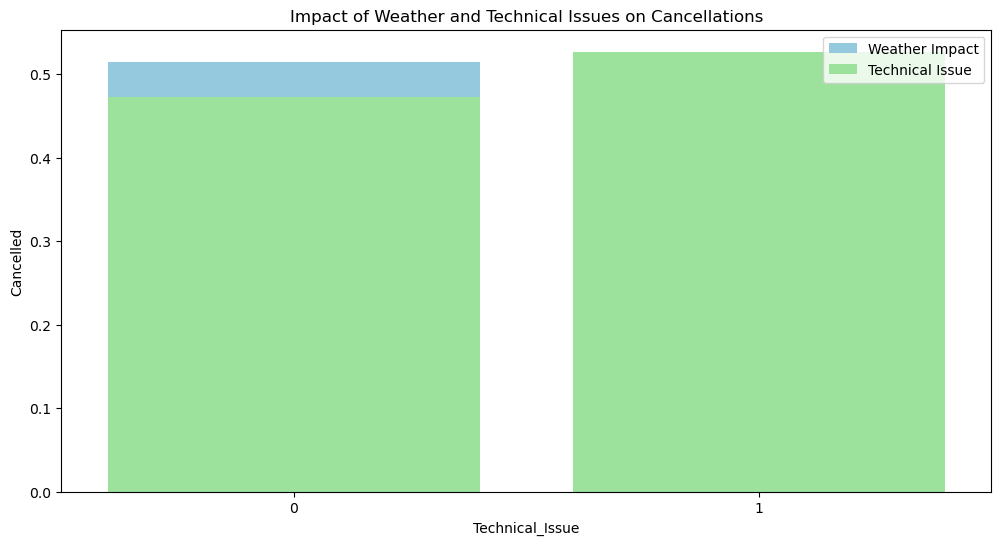

In [11]:

# Visualizing the impact of weather and technical issues on cancellations
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather_Impact', y='Cancelled', data=aviation_data, estimator=lambda x: len(x)/len(aviation_data), ci=None, color='skyblue', label='Weather Impact')
sns.barplot(x='Technical_Issue', y='Cancelled', data=aviation_data, estimator=lambda x: len(x)/len(aviation_data), ci=None, color='lightgreen', label='Technical Issue')
plt.title('Impact of Weather and Technical Issues on Cancellations')
plt.legend()
plt.show()


### Correlation Heatmap

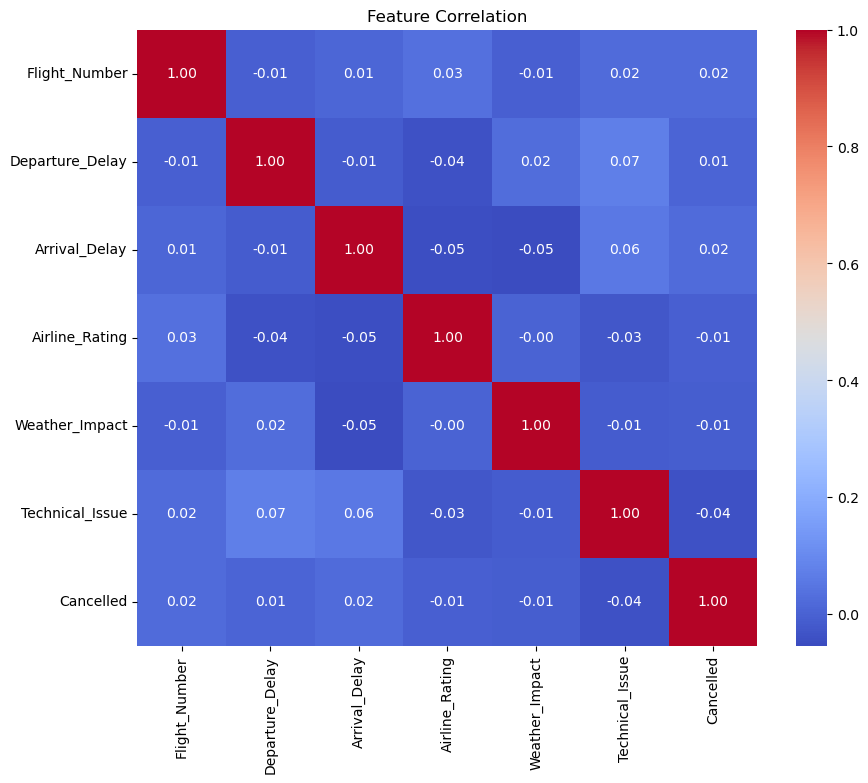

In [12]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(aviation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation")
plt.show()


## Feature Engineering
Here we create new features or modify existing ones to improve model performance.

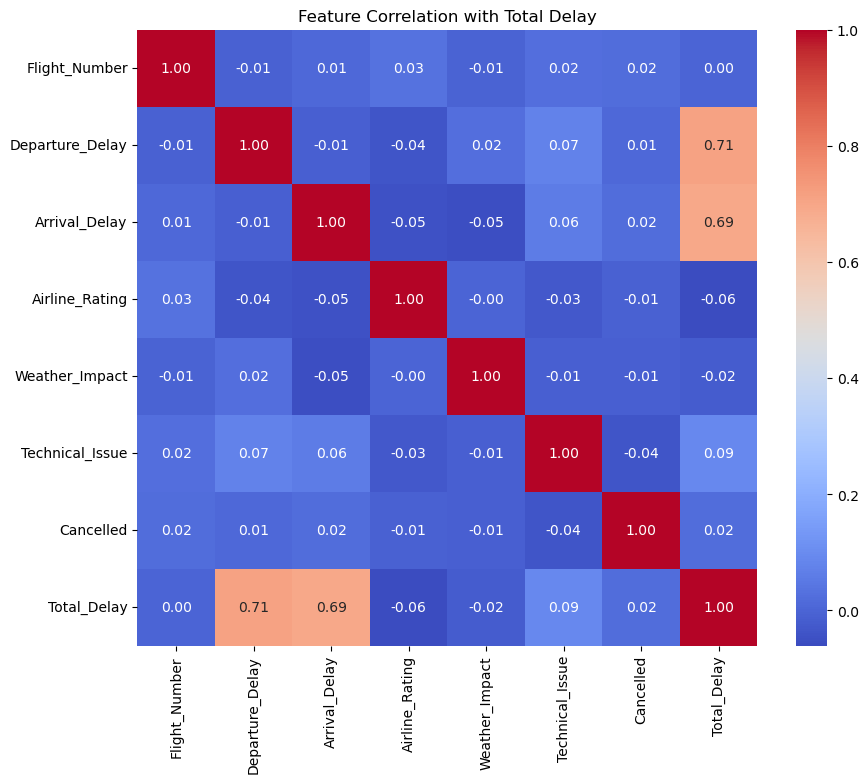

In [13]:

# Feature engineering example: Adding a feature for total delay (departure + arrival)
aviation_data['Total_Delay'] = aviation_data['Departure_Delay'] + aviation_data['Arrival_Delay']

# Rechecking correlations with new feature
plt.figure(figsize=(10, 8))
sns.heatmap(aviation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation with Total Delay")
plt.show()


## Model Building
We use a Random Forest Classifier to predict the target variable (Cancelled) based on the features provided.

In [14]:

# Define features and target
X = aviation_data.drop(['Cancelled', 'Flight_Number'], axis=1)
y = aviation_data['Cancelled']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.58       161
           1       0.53      0.58      0.55       139

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.57      0.56      0.56       300

Confusion Matrix:
 [[89 72]
 [59 80]]


### Feature Importance
Understanding which features are most important for the model.

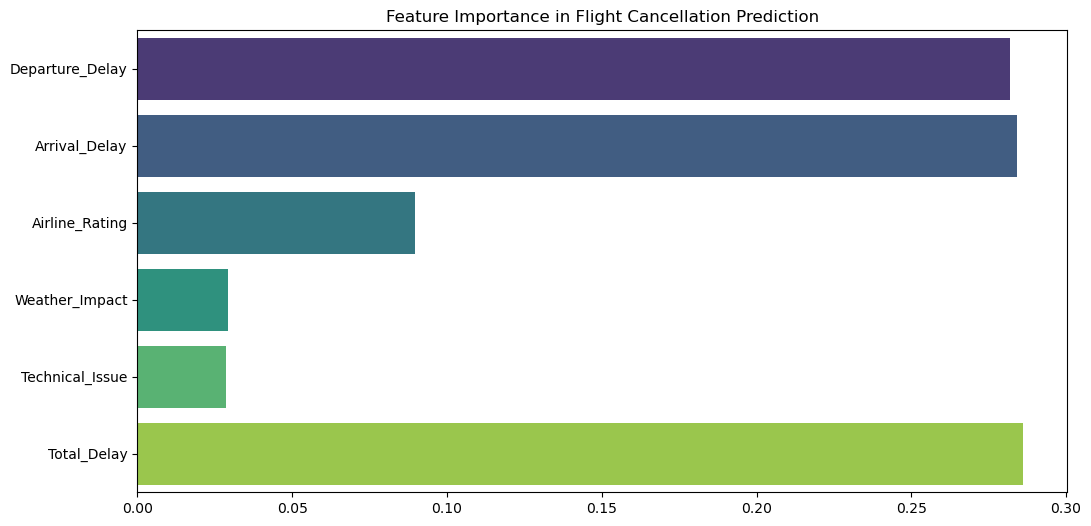

In [15]:

# Feature importance from the Random Forest model
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Feature Importance in Flight Cancellation Prediction')
plt.show()


## Cross-Validation
Cross-validation provides a better understanding of how the model generalizes to unseen data.

In [16]:

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.53  0.52  0.525 0.465 0.495]
Average cross-validation score: 0.507


## Hyperparameter Tuning
We use GridSearchCV to find the best parameters for the Random Forest model.

In [17]:

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found by GridSearchCV: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


## ROC Curve
We plot the ROC curve to visualize the model's performance in terms of sensitivity and specificity.

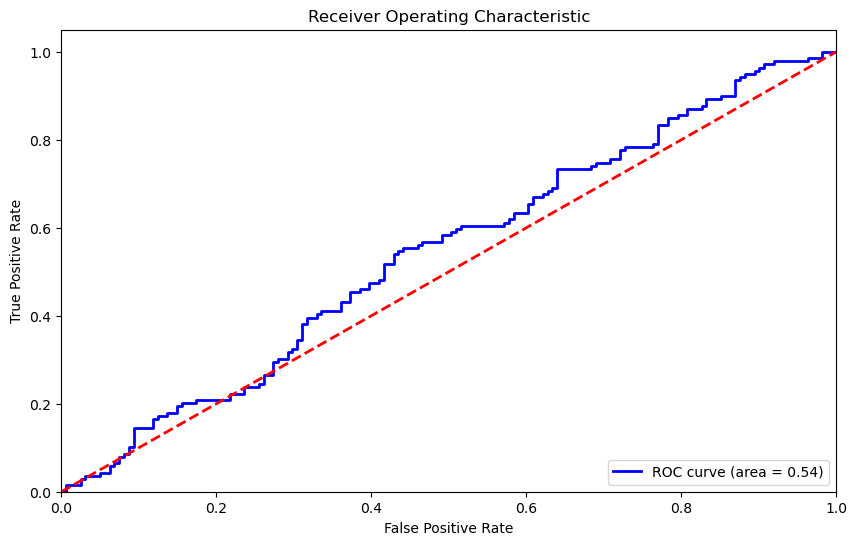

In [18]:

# Plotting ROC curve
y_proba = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Conclusion
This notebook demonstrated the use of a Random Forest Classifier for predicting flight cancellations. We performed Exploratory Data Analysis (EDA), Feature Engineering, Cross-Validation, and Hyperparameter Tuning to optimize the model's performance. The ROC curve provided a visual insight into the model's effectiveness. Further improvements could include testing more complex models or acquiring more data to enhance accuracy.